In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# **Feature Selection**

Tree-based models such as RandomForest, XGBoost or LightGBM provide 'feature_importance_' method that rank features.

We can use that, then drop the ones we don't need based on a threshold or percentile. A common practice would be to the fix the threshold at 1% - which works well when you have many features - or percentile_based, meaning sorting features by importance and keeping the smallest number of features whose total importance adds up to 80-95%. 

In [1]:
from sklearn.ensemble import ExtraTreesRegressor
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X_train = pd.read_csv('C:/Users/S580381/Documents/GitHub/marketing_camp_rev_pred/data/X_train.csv')
y_train = pd.read_csv('C:/Users/S580381/Documents/GitHub/marketing_camp_rev_pred/data/y_train.csv')
X_test = pd.read_csv('C:/Users/S580381/Documents/GitHub/marketing_camp_rev_pred/data/X_test.csv')
y_test = pd.read_csv('C:/Users/S580381/Documents/GitHub/marketing_camp_rev_pred/data/y_test.csv')

In [3]:
#Train data
model = ExtraTreesRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

#Get feature importances
importances = model.feature_importances_
feature_names = X_train.columns

c:\Users\S580381\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


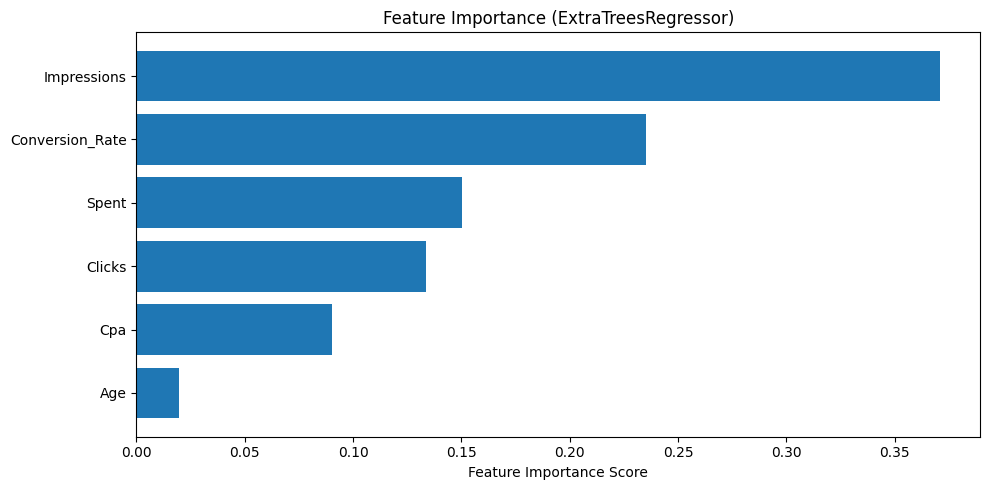

In [4]:
#Visualize feature importance
feat_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 5))
plt.barh(feat_importance_df['Feature'], feat_importance_df['Importance'])
plt.xlabel("Feature Importance Score")
plt.title("Feature Importance (ExtraTreesRegressor)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [5]:
#Selecting feature based on threshold
selected_features = feat_importance_df[feat_importance_df['Importance'] > 0.01]['Feature']
X_train = X_train[selected_features]
X_test = X_test[selected_features] 

In [6]:
X_train.head()

,Impressions,Conversion_Rate,Spent,Clicks,Cpa,Age
0,5117,0.000000,0.000000,0,0.000000,32
1,478480,0.040000,135.750001,75,45.250000,47
2,76355,0.222222,14.630000,9,7.315000,37
3,475184,0.045455,127.320003,88,31.830001,37
4,208572,0.055556,60.760000,36,30.380000,42


In [7]:
X_test.head()

,Impressions,Conversion_Rate,Spent,Clicks,Cpa,Age
0,792,0.000000,0.000000,0,0.000000,32
1,134245,0.111111,25.750000,18,12.875000,47
2,13473,1.000000,2.620000,3,0.873333,32
3,98759,0.066667,26.569999,15,26.569999,32
4,2912,0.000000,0.000000,0,0.000000,47


In [74]:
#Save the selected features to a CSV file
X_train.to_csv('C:/Users/S580381/Documents/GitHub/marketing_camp_rev_pred/data/X_train.csv', index=False)
X_test.to_csv('C:/Users/S580381/Documents/GitHub/marketing_camp_rev_pred/data/X_test.csv', index=False)